# **CASE STUDY 1**
• Choose one (1) real-world problem. Discuss the given scenario or the problem.

• Create an algorithm to solve the given problem.

• Apply applicable techniques to solve the problems (optimization, dynamic
programming or graph)

• Create a slide presentation of the case study.

• Create a folder in your Github repo for the course; the folder must contain your source code and pdf of the presentation.

# **PROBLEM**

A student of TIP who lives in Maly San Mateo is having a hard time deciding which route he will take in order for him to save money and time. With the given Graph below, we can see the distance between the landmarks that he will come across during his trip to TIP.

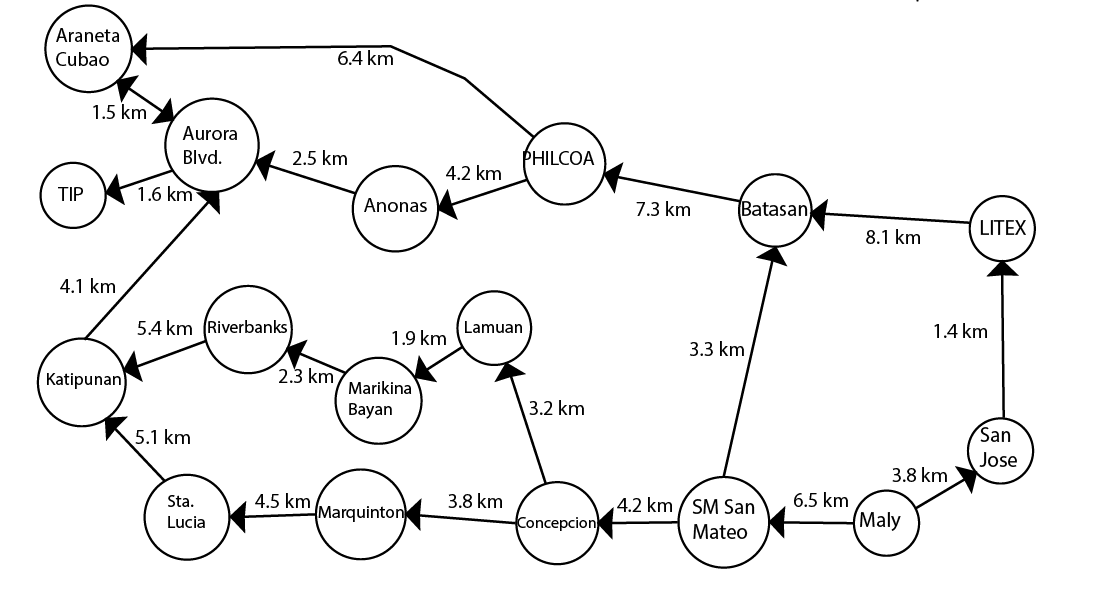

The estimated fare for the public transportation is also listed below.

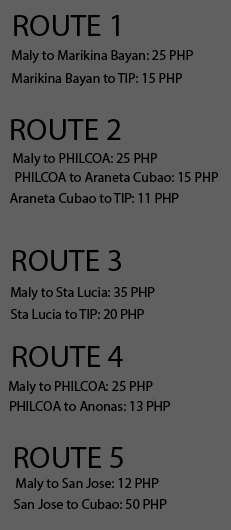

The code created aims to provide the student the shortest route he can take from his house Maly, to hist destination TIP

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name

    def getName(self):
        return self.name

    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest, distance):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
        self.distance = distance
    def getDistance(self):
        return self.distance
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return f"{self.src.getName()} -> {self.dest.getName()} Distance: {self.distance} km"

class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest, distance in self.edges[src]:
                result += f"{src.getName()} -> {dest.getName()} Distance: {distance} km\n"
        return result[:-1]

class Graph(Digraph):
  def addEdge(self, edge):
      Digraph.addEdge(self, edge)
      rev = Edge(edge.getDestination(), edge.getSource(), edge.getDistance())
      Digraph.addEdge(self, rev)

def buildGraph(graphType):
    g = graphType()
    for name in ('Maly', 'San Jose', 'LITEX', 'Batasan', 'Philcoa',
                 'Kalayaan Ave.', 'Araneta-Cubao', 'Aurora Blvd.',
                 'TIP', 'Anonas', 'SM San Mateo', 'Concepcion',
                 'Lamuan', 'Marikina-Bayan', 'Marquinton', 'Sta. Lucia',
                 'Katipunan Ave.', 'Riverbanks'):
        g.addNode(Node(name))

    g.addEdge(Edge(g.getNode('Maly'), g.getNode('San Jose'),3.8))
    g.addEdge(Edge(g.getNode('San Jose'), g.getNode('LITEX'),1.4))
    g.addEdge(Edge(g.getNode('LITEX'), g.getNode('Batasan'),8.1))
    g.addEdge(Edge(g.getNode('Batasan'), g.getNode('Philcoa'),7.3))
    g.addEdge(Edge(g.getNode('Philcoa'), g.getNode('Araneta-Cubao'),6.4))
    g.addEdge(Edge(g.getNode('Araneta-Cubao'), g.getNode('Aurora Blvd.'),1.5))
    g.addEdge(Edge(g.getNode('Aurora Blvd.'), g.getNode('TIP'),1.6))
    g.addEdge(Edge(g.getNode('Philcoa'), g.getNode('Anonas'),4.2))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Aurora Blvd.'),2.5))
    g.addEdge(Edge(g.getNode('Maly'), g.getNode('SM San Mateo'),6.5))
    g.addEdge(Edge(g.getNode('SM San Mateo'), g.getNode('Batasan'),3.3))
    g.addEdge(Edge(g.getNode('SM San Mateo'), g.getNode('Concepcion'),4.2))
    g.addEdge(Edge(g.getNode('Concepcion'), g.getNode('Lamuan'),3.2))
    g.addEdge(Edge(g.getNode('Concepcion'), g.getNode('Marquinton'),3.8))
    g.addEdge(Edge(g.getNode('Lamuan'), g.getNode('Marikina-Bayan'),1.9))
    g.addEdge(Edge(g.getNode('Marikina-Bayan'), g.getNode('Riverbanks'),2.3))
    g.addEdge(Edge(g.getNode('Riverbanks'), g.getNode('Katipunan Ave.'),5.4))
    g.addEdge(Edge(g.getNode('Marquinton'), g.getNode('Sta. Lucia'),4.5))
    g.addEdge(Edge(g.getNode('Sta. Lucia'), g.getNode('Katipunan Ave.'),5.1))
    g.addEdge(Edge(g.getNode('Katipunan Ave.'), g.getNode('Aurora Blvd.'),4.1))

    return g

def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result


def DFS(graph, start, end, path, shortest, toPrint = False):
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path:
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest


def shortestPath(graph, start, end ,toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

def testSP(source, destination):
    g = buildGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

testSP('Maly', 'TIP')



Current DFS path: Maly
Current DFS path: Maly->San Jose
Current DFS path: Maly->San Jose->LITEX
Current DFS path: Maly->San Jose->LITEX->Batasan
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Araneta-Cubao
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Araneta-Cubao->Aurora Blvd.
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Araneta-Cubao->Aurora Blvd.->TIP
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Anonas
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Anonas->Aurora Blvd.
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Anonas->Aurora Blvd.->TIP
Current DFS path: Maly->SM San Mateo
Current DFS path: Maly->SM San Mateo->Batasan
Current DFS path: Maly->SM San Mateo->Batasan->Philcoa
Current DFS path: Maly->SM San Mateo->Batasan->Philcoa->Araneta-Cubao
Current DFS path: Maly->SM San Mateo->Batasan->Philcoa->Araneta-Cubao->Aurora Blvd.
Current DFS path: Maly

In [1]:
class Node(object):
    def __init__(self, name):
        self.name = name

    def getName(self):
        return self.name

    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest, distance):
        self.src = src
        self.dest = dest
        self.distance = distance

    def getDistance(self):
        return self.distance

    def getSource(self):
        return self.src

    def getDestination(self):
        return self.dest

    def __str__(self):
        return f"{self.src.getName()} -> {self.dest.getName()} Distance: {self.distance} km"

class Digraph(object):
    def __init__(self):
        self.edges = {}

    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []

    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append((dest, edge.getDistance()))

    def childrenOf(self, node):
        return self.edges[node]

    def hasNode(self, node):
        return node in self.edges

    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest, distance in self.edges[src]:
                result += f"{src.getName()} -> {dest.getName()} Distance: {distance} km\n"
        return result[:-1]

class Graph(Digraph):
  def addEdge(self, edge):
      Digraph.addEdge(self, edge)
      rev = Edge(edge.getDestination(), edge.getSource(), edge.getDistance())
      Digraph.addEdge(self, rev)

def buildGraph(graphType):
    g = graphType()
    for name in ('Maly', 'San Jose', 'LITEX', 'Batasan', 'Philcoa',
                 'Kalayaan Ave.', 'Araneta-Cubao', 'Aurora Blvd.',
                 'TIP', 'Anonas', 'SM San Mateo', 'Concepcion',
                 'Lamuan', 'Marikina-Bayan', 'Marquinton', 'Sta. Lucia',
                 'Katipunan Ave.', 'Riverbanks'):
        g.addNode(Node(name))

    g.addEdge(Edge(g.getNode('Maly'), g.getNode('San Jose'),3.8))
    g.addEdge(Edge(g.getNode('San Jose'), g.getNode('LITEX'),1.4))
    g.addEdge(Edge(g.getNode('LITEX'), g.getNode('Batasan'),8.1))
    g.addEdge(Edge(g.getNode('Batasan'), g.getNode('Philcoa'),7.3))
    g.addEdge(Edge(g.getNode('Philcoa'), g.getNode('Araneta-Cubao'),6.4))
    g.addEdge(Edge(g.getNode('Araneta-Cubao'), g.getNode('Aurora Blvd.'),1.5))
    g.addEdge(Edge(g.getNode('Aurora Blvd.'), g.getNode('TIP'),1.6))
    g.addEdge(Edge(g.getNode('Philcoa'), g.getNode('Anonas'),4.2))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Aurora Blvd.'),2.5))
    g.addEdge(Edge(g.getNode('Maly'), g.getNode('SM San Mateo'),6.5))
    g.addEdge(Edge(g.getNode('SM San Mateo'), g.getNode('Batasan'),3.3))
    g.addEdge(Edge(g.getNode('SM San Mateo'), g.getNode('Concepcion'),4.2))
    g.addEdge(Edge(g.getNode('Concepcion'), g.getNode('Lamuan'),3.2))
    g.addEdge(Edge(g.getNode('Concepcion'), g.getNode('Marquinton'),3.8))
    g.addEdge(Edge(g.getNode('Lamuan'), g.getNode('Marikina-Bayan'),1.9))
    g.addEdge(Edge(g.getNode('Marikina-Bayan'), g.getNode('Riverbanks'),2.3))
    g.addEdge(Edge(g.getNode('Riverbanks'), g.getNode('Katipunan Ave.'),5.4))
    g.addEdge(Edge(g.getNode('Marquinton'), g.getNode('Sta. Lucia'),4.5))
    g.addEdge(Edge(g.getNode('Sta. Lucia'), g.getNode('Katipunan Ave.'),5.1))
    g.addEdge(Edge(g.getNode('Katipunan Ave.'), g.getNode('Aurora Blvd.'),4.1))

    return g

def printPath(path):
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

def calculateDistance(graph, path):
    total_distance = 0
    for i in range(len(path)-1):
        node = path[i]
        next_node = path[i+1]
        edges = graph.edges[node]
        for dest, distance in edges:
            if dest == next_node:
                total_distance += distance
                break
    return total_distance

def DFS(graph, start, end, path, shortest_path, shortest_distance, toPrint=False):
    path = path + [start]
    if toPrint and path[-1].getName() == "TIP":
        print('Current DFS path:', printPath(path))
    if start == end:
        distance = calculateDistance(graph, path)
        if shortest_distance is None or distance < shortest_distance:
            shortest_distance = distance
            shortest_path = path
            print('Total distance:', round(shortest_distance, 2), 'km')
        else:
            print('Total distance:', round(distance, 2), 'km')
        return shortest_path, shortest_distance
    for node, distance in graph.childrenOf(start):
        if node not in path:
            shortest_path, shortest_distance = DFS(graph, node, end, path, shortest_path, shortest_distance, toPrint)
    return shortest_path, shortest_distance

def shortestPath(graph, start, end, toPrint=False):
    shortest_path, shortest_distance = DFS(graph, start, end, [], None, None, toPrint)
    return shortest_path

def testSP(source, destination):
    g = buildGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination), toPrint=True)
    if sp:
        print('Shortest path from', source, 'to', destination, 'is', printPath(sp))
        print('Shortest distance:', round(calculateDistance(g, sp), 2), 'km')
    else:
        print('There is no path from', source, 'to', destination)

testSP('Maly', 'TIP')

Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Araneta-Cubao->Aurora Blvd.->TIP
Total distance: 30.1 km
Current DFS path: Maly->San Jose->LITEX->Batasan->Philcoa->Anonas->Aurora Blvd.->TIP
Total distance: 28.9 km
Current DFS path: Maly->SM San Mateo->Batasan->Philcoa->Araneta-Cubao->Aurora Blvd.->TIP
Total distance: 26.6 km
Current DFS path: Maly->SM San Mateo->Batasan->Philcoa->Anonas->Aurora Blvd.->TIP
Total distance: 25.4 km
Current DFS path: Maly->SM San Mateo->Concepcion->Lamuan->Marikina-Bayan->Riverbanks->Katipunan Ave.->Aurora Blvd.->TIP
Total distance: 29.2 km
Current DFS path: Maly->SM San Mateo->Concepcion->Marquinton->Sta. Lucia->Katipunan Ave.->Aurora Blvd.->TIP
Total distance: 29.8 km
Shortest path from Maly to TIP is Maly->SM San Mateo->Batasan->Philcoa->Anonas->Aurora Blvd.->TIP
Shortest distance: 25.4 km
